Imports

In [525]:
# imports for libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Loading the Data

In [526]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0).drop_duplicates() # (30155,25), 3 duplicated entries

## Inspecting

In [527]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30152 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30152 non-null  object 
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  int64  
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  int64  
 5   sqft_lot       30152 non-null  int64  
 6   floors         30152 non-null  float64
 7   waterfront     30152 non-null  object 
 8   greenbelt      30152 non-null  object 
 9   nuisance       30152 non-null  object 
 10  view           30152 non-null  object 
 11  condition      30152 non-null  object 
 12  grade          30152 non-null  object 
 13  heat_source    30120 non-null  object 
 14  sewer_system   30138 non-null  object 
 15  sqft_above     30152 non-null  int64  
 16  sqft_basement  30152 non-null  int64  
 17  sqft_garage    30152 non-null  int64

In [529]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015200e+04,30152.000000,30152.000000,30152.000000,3.015200e+04,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000
mean,1.108029e+06,3.413571,2.334671,2112.408729,1.672492e+04,1.543380,1809.839347,476.010812,330.227414,217.396856,1975.159591,90.931348,47.328477,-121.319050
std,8.946277e+05,0.981653,0.889548,974.052997,6.038545e+04,0.567615,878.325182,579.635101,285.770425,245.309503,32.065976,416.492770,1.433181,5.722034
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405361,-122.326050
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551385,-122.225635
75%,1.300000e+06,4.000000,3.000000,2619.250000,1.057925e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669911,-122.116236
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Correlations of all heatmap

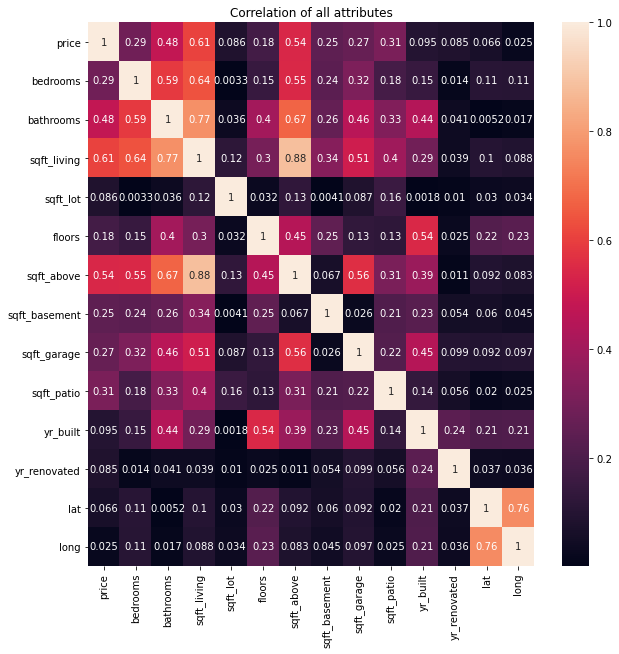

In [530]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True).set(title = "Correlation of all attributes");

Splitting the data into cat and num

In [531]:
numeric_df = df.select_dtypes([int,float])
numeric_df = numeric_df.reset_index()
numeric_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188


In [532]:
cat_df = df.select_dtypes(object)
cat_df = cat_df.reset_index()
cat_df.head()

,id,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,7399300360,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,8910500230,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,1180000275,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,1604601802,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8562780790,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


## Numeric Heatmap

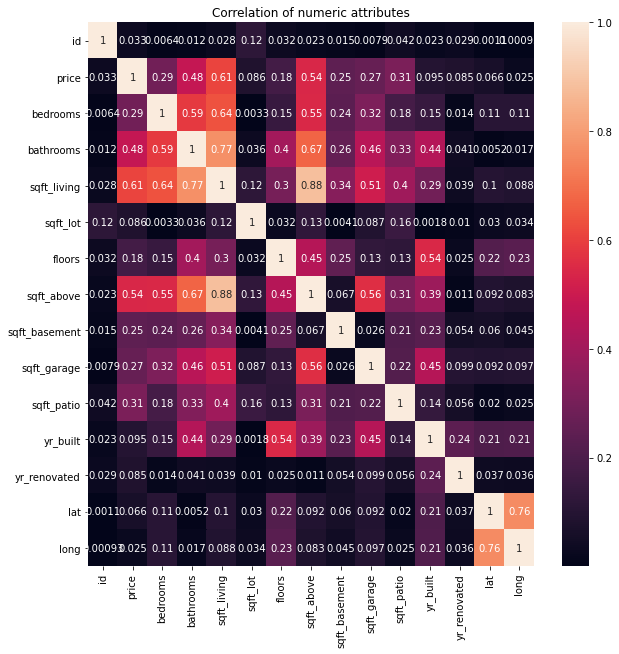

In [533]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(numeric_df.corr()),annot=True).set(title = "Correlation of numeric attributes");

Cleaning addresses

In [534]:
cat_df["address"].values

array(['2102 Southeast 21st Court, Renton, Washington 98055, United States',
       '11231 Greenwood Avenue North, Seattle, Washington 98133, United States',
       '8504 South 113th Street, Seattle, Washington 98178, United States',
       ...,
       '910 Martin Luther King Jr Way, Seattle, Washington 98122, United States',
       '17127 114th Avenue Southeast, Renton, Washington 98055, United States',
       '18615 7th Avenue South, Burien, Washington 98148, United States'],
      dtype=object)

In [535]:

zips = []
street_num = []
street_name = []
city = []
state = []
country = []

# make the address data useable
for i in cat_df["address"]:
    # create variable to store partitioned strings from address column
    # first will be used in certain iterations
    info = i.split(",")
    first = info[0].split(" ")

    # store variables in appropriate lists
    zips.append(info[-2][-5:])
    street_num.append(first[0])
    street_name.append(" ".join(first[1:len(first)]))
    city.append(info[1][1:])
    state.append(info[-2][1:-6])
    country.append(info[-1][1:])

# create columns from the lists in the cat_df
cat_df["zips"] = zips
cat_df["street_num"] = street_num
cat_df["street_name"] = street_name
cat_df["city"] = city
cat_df["state"]= state
cat_df["country"] = country

cat_df.head()


,id,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address,zips,street_num,street_name,city,state,country
0,7399300360,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ...",98055,2102,Southeast 21st Court,Renton,Washington,United States
1,8910500230,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing...",98133,11231,Greenwood Avenue North,Seattle,Washington,United States
2,1180000275,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9...",98178,8504,South 113th Street,Seattle,Washington,United States
3,1604601802,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington...",98118,4079,Letitia Avenue South,Seattle,Washington,United States
4,8562780790,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt...",98027,2193,Northwest Talus Drive,Issaquah,Washington,United States


Cleaning dates

In [536]:
month_int = []
day_int = []
year_int = []

# split up the date column into a seperate month, day, year column for use as int
for i in cat_df["date"]:
    info = i.split("/")
    month_int.append(int(info[0]))
    day_int.append(int(info[1]))
    year_int.append(int(info[2]))

cat_df["mont_int"] = month_int
cat_df["day_int"] = day_int
cat_df["year_int"] = year_int

cat_df.head()

,id,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address,zips,street_num,street_name,city,state,country,mont_int,day_int,year_int
0,7399300360,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ...",98055,2102,Southeast 21st Court,Renton,Washington,United States,5,24,2022
1,8910500230,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing...",98133,11231,Greenwood Avenue North,Seattle,Washington,United States,12,13,2021
2,1180000275,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9...",98178,8504,South 113th Street,Seattle,Washington,United States,9,29,2021
3,1604601802,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington...",98118,4079,Letitia Avenue South,Seattle,Washington,United States,12,14,2021
4,8562780790,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt...",98027,2193,Northwest Talus Drive,Issaquah,Washington,United States,8,24,2021


## Encoding Categoricals

In [537]:
# check for N/A
print(cat_df["waterfront"].isna().sum())
print(cat_df["greenbelt"].isna().sum())
print(cat_df["nuisance"].isna().sum())
print(cat_df["view"].isna().sum())
print(cat_df["condition"].isna().sum())
print(cat_df["grade"].isna().sum())
print(cat_df["heat_source"].isna().sum())
print(cat_df["sewer_system"].isna().sum())

cat_df = cat_df.dropna()


0
0
0
0
0
0
32
14


In [538]:
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)
# ['waterfront','greenbelt', "nuisance", "view", "condition", "grade", "heat_source", "sewer_system", "zips", "year_int", "city"]
nominal_cols = ['waterfront','greenbelt', "nuisance","view", "condition", "grade", "heat_source", "sewer_system", "zips", "year_int", "city"]
x=onehot_enc.fit_transform(cat_df[nominal_cols])
names = list(onehot_enc.get_feature_names())
len(names)


752

In [539]:
enc_cat_df = pd.DataFrame(x)
names_dict = {i:names[i] for i in range(0,len(names))}
enc_cat_df = enc_cat_df.rename(columns=names_dict)
enc_cat_df

,x0_YES,x1_YES,x2_YES,x3_EXCELLENT,x3_FAIR,x3_GOOD,x3_NONE,x4_Fair,x4_Good,x4_Poor,...,x10_West Tisbury,x10_Westport,x10_White Center,x10_Whitehall,x10_Whittier,x10_Williston,x10_Woodbury,x10_Woodinville,x10_Yaphank,x10_Yarrow Point
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30103,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30104,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30105,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Testing numeric features

Defining Functions

In [540]:
# model_cols = [0]

# X = wgn_enc_df[model_cols]
# y = numeric_df['price']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)
# model_wgn = LinearRegression()
# model_wgn.fit(X_train, y_train)

# model_wgn.score(X_train, y_train)

# model_wgn.score(X_test,y_test)
# model_wgn.intercept_
# expected1 = y_test
# predicted1 = model_wgn.predict(X_test)
# mse2 = sum((y_test - predicted1)**2)
# mse2
# y_hat = predicted1
# resid = (y_test - y_hat)

# fig, ax = plt.subplots()
# ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

In [568]:
def stats_test(data,X_main,y_main):
            
    """
    Define a function that can take in a dataframe (data), iterate through each column (X_main,) \
    and conduct a simple linear regression against y (y_main). Train, test split is done, the data is scaled\
    since this only works for numerics. The output is a dataframe with all the features in the rows, and \
    statistical tests in the columns. An OLS summary is also printed for each column being iterated \
    
    Parameters
        ----------
        data = a numeric df
        X_main = features to test: independent variable
        y_main = feature being measured: dependent variable

        Returns
        -------
        df of stats measures for each feature

    """

    df = pd.DataFrame(columns = ["R_squared", "MSE", "Coef", "Intercept"])
    for i in X_main:
        X = data[[i]]
        y = data[[y_main]]

        # train test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state = 42)
        
        # scale the data to normalize and fit
        scaler = StandardScaler()
        scaler.fit(X_train,y_train)

        # transform
        y_train_scaled = scaler.transform(y_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # form dataframes for test and train data
        X_train_scaled = pd.DataFrame(X_train_scaled,
                                    columns=X_train.columns,
                                    index=X_train.index)
        X_test_scaled = pd.DataFrame(X_test_scaled,
                                    columns=X_test.columns,
                                    index=X_test.index)
        
        # instantiate a sk.learn simple linear model
        model= LinearRegression()
        model.fit(X_train_scaled, y_train)

        # conduct stats tests
        expected = np.array(y_test)
        predicted= model.predict(X_test_scaled)
        mse = int(sum((expected - predicted)**2))
        r2 = model.score(X_train_scaled, y_train)
        coef = float(model.coef_)
        intercept = model.intercept_

        # create columns with stats variables
        df.loc[len(df.index)+1] = [r2, mse, coef, intercept]
        #model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
        #print(model_OLS.summary())

    # set row names to correspond and reset index
    df[y_main] = X_main
    df.set_index([y_main], drop=True, inplace=True)
    df = df.reset_index()

    return df


In [569]:
# all variables vs all variables and find highest R
def correlate(data):
    """
    Params:
    dataframe to be iterated with stats test
    Output = dictionary with dependent variables as a key to a dictionary with the independent variable and corresponding r2
    """
    highest_R = {}
    for i in data.columns:
        y = i
        model_cols = list(data.drop(columns = y, axis=1).columns)
        X_df = stats_test(data,model_cols,y)
        highest_R.update({y: {X_df.iloc[int(X_df.loc[X_df["R_squared"] == X_df["R_squared"].max()].index[0])][0]\
                            : X_df["R_squared"].max()}})
    
    return highest_R

In [570]:
def MSE(data):
    """
    Params: 
    dataframe which will be iterated for a stats test

    Output = dictionary with dependent variables as the key to a dict with the least error variable and its corresponding error
    """
    MSE_lowest = {}
    for i in data.columns:
        y = i
        model_cols = list(data.drop(columns = y, axis=1).columns)
        X_df = stats_test(data,model_cols,y)
        MSE_lowest.update({y: {X_df.iloc[int(X_df.loc[X_df["MSE"] == X_df["MSE"].min()].index[0])][0]\
                            : X_df["MSE"].min()}})
        
    return MSE_lowest

In [571]:
# single variable test for price as the dependent and the other columns as independent
y = "price"
model_cols = list(numeric_df.drop(columns = y, axis=1).columns)
X_df = stats_test(numeric_df,model_cols,y)
X_df.sort_values(by="R_squared", ascending=False)

,price,R_squared,MSE,Coef,Intercept
3,sqft_living,0.362990,2786845826296059,540530.269019,[1105168.26491439]
6,sqft_above,0.285664,3225125675938817,479513.393154,[1105168.26491439]
2,bathrooms,0.222878,3457081874006902,423551.349963,[1105168.26491439]
9,sqft_patio,0.096227,4211345252806321,278305.703985,[1105168.26491439]
1,bedrooms,0.080313,4246558550842999,254252.784607,[1105168.26491439]
8,sqft_garage,0.069508,4368094804259179,236532.451119,[1105168.26491439]
7,sqft_basement,0.057804,4384464355696713,215701.338377,[1105168.26491439]
5,floors,0.030839,4537066294534626,157552.687801,[1105168.26491439]
10,yr_built,0.008825,4668274815767883,84281.483947,[1105168.26491439]
11,yr_renovated,0.007502,4687753142686419,77708.533302,[1105168.26491439]


## Multiple tests at once

In [572]:
#x = correlate(numeric_df)
#x

In [573]:
#x_1 = MSE(numeric_df)
#x_1

In [574]:
# correlate(enc_cat_df)

In [575]:
# MSE(enc_cat_df)

## Merge the DFs

In [576]:
numeric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30152 entries, 0 to 30151
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30152 non-null  float64
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  float64
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  float64
 5   sqft_lot       30152 non-null  float64
 6   floors         30152 non-null  float64
 7   sqft_above     30152 non-null  float64
 8   sqft_basement  30152 non-null  float64
 9   sqft_garage    30152 non-null  float64
 10  sqft_patio     30152 non-null  float64
 11  yr_built       30152 non-null  float64
 12  yr_renovated   30152 non-null  float64
 13  lat            30152 non-null  float64
 14  long           30152 non-null  float64
dtypes: float64(15)
memory usage: 3.5 MB


In [577]:
numeric_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7.399300e+09,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,40.0,1969.0,0.0,47.461975,-122.19052
1,8.910500e+09,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,240.0,1950.0,0.0,47.711525,-122.35591
2,1.180000e+09,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,0.0,1956.0,0.0,47.502045,-122.22520
3,1.604602e+09,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,270.0,2010.0,0.0,47.566110,-122.29020
4,8.562781e+09,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,30.0,2012.0,0.0,47.532470,-122.07188


In [578]:
enc_cat_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [579]:
numeric_df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
lat              0
long             0
dtype: int64

In [580]:
numeric_df = numeric_df.applymap(float)

In [581]:
numeric_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7.399300e+09,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,40.0,1969.0,0.0,47.461975,-122.19052
1,8.910500e+09,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,240.0,1950.0,0.0,47.711525,-122.35591
2,1.180000e+09,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,0.0,1956.0,0.0,47.502045,-122.22520
3,1.604602e+09,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,270.0,2010.0,0.0,47.566110,-122.29020
4,8.562781e+09,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,30.0,2012.0,0.0,47.532470,-122.07188


In [582]:
num_cat_df = numeric_df.join(enc_cat_df, how='inner')
num_cat_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,x10_West Tisbury,x10_Westport,x10_White Center,x10_Whitehall,x10_Whittier,x10_Williston,x10_Woodbury,x10_Woodinville,x10_Yaphank,x10_Yarrow Point
0,7.399300e+09,675000.0,4.0,1.0,1180.0,7140.0,1.0,1180.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.910500e+09,920000.0,5.0,2.5,2770.0,6703.0,1.0,1570.0,1570.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.180000e+09,311000.0,6.0,2.0,2880.0,6156.0,1.0,1580.0,1580.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.604602e+09,775000.0,3.0,3.0,2160.0,1400.0,2.0,1090.0,1070.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.562781e+09,592500.0,2.0,2.0,1120.0,758.0,2.0,1120.0,550.0,550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [583]:
# num_cat_df.isnull().sum().sum()

In [584]:
# correlate(num_cat_df)

In [585]:
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(abs(num_cat_df.corr()),annot=True).set(title = "Correlation of all attributes OHE");

In [586]:
#num_cat_df.corr()

In [587]:
enc_cat_df.columns.value_counts()

x10_Vashon              1
x8_93523                1
x8_98001                1
x8_53095                1
x10_Miami               1
                       ..
x10_Butler              1
x10_Leigh               1
x10_East Saint Louis    1
x8_63090                1
x10_Baring              1
Length: 752, dtype: int64

In [617]:
y = "price"
model_cols = list(num_cat_df.drop(columns = y, axis=1).columns)
X_df = stats_test(num_cat_df,model_cols,y)
tester = X_df.sort_values(by="R_squared", ascending=False).head(21)
tester

,price,R_squared,MSE,Coef,Intercept
3,sqft_living,0.362026,2907897124330346,536977.958560,[1105380.317487337]
6,sqft_above,0.284465,3356902455824531,475993.274236,[1105380.317487337]
2,bathrooms,0.225403,3674374556886477,423707.342570,[1105380.317487337]
9,sqft_patio,0.098251,4438961919383862,279739.547037,[1105380.317487337]
1,bedrooms,0.082431,4483409990928928,256230.973442,[1105380.317487337]
8,sqft_garage,0.069284,4559540972657211,234910.308578,[1105380.317487337]
7,sqft_basement,0.056684,4562363364155831,212479.103012,[1105380.317487337]
5,floors,0.033546,4792634914458057,163457.157054,[1105380.317487337]
76,x8_10550,0.014529,4927511370697110,107572.981217,[1105380.317487337]
629,x10_Mount Vernon,0.014529,4927511370697110,107572.981217,[1105380.317487337]


In [618]:
test_names = [i for i in tester[y]]
test_names

['sqft_living',
 'sqft_above',
 'bathrooms',
 'sqft_patio',
 'bedrooms',
 'sqft_garage',
 'sqft_basement',
 'floors',
 'x8_10550',
 'x10_Mount Vernon',
 'yr_renovated',
 'yr_built',
 'sqft_lot',
 'lat',
 'x8_55404',
 'id',
 'x10_Clarkston',
 'x8_99403',
 'long',
 'x10_Minneapolis',
 'x10_Clyde Hill']

In [619]:
X = num_cat_df[test_names]
y = np.log(num_cat_df[["price"]])

# form dataframes for test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
# scale the data to normalize and fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# form dataframes for test and train data
X_train_scaled = pd.DataFrame(X_train_scaled,
                            columns=X_train.columns,
                            index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                            columns=X_test.columns,
                            index=X_test.index)
        
# instantiate a sk.learn simple linear model
model= LinearRegression()
model.fit(X_train_scaled, y_train)

# conduct stats tests
expected = np.array(y_test)
predicted= model.predict(X_test_scaled)
mse = int(sum((expected - predicted)**2))
r2 = model.score(X_train_scaled, y_train)
#coef = float(model.coef_)
intercept = model.intercept_

# create columns with stats variables
model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
print(model_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     911.6
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:24:35   Log-Likelihood:                -14625.
No. Observations:               24086   AIC:                         2.929e+04
Df Residuals:                   24066   BIC:                         2.945e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.7328      0.003  